In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Subir los datos al colab
df = pd.read_excel('datosproyecto.xlsx')

# Verifica que se subieron los datos
df.head()


,Y,X1,X2
0,41,-16,45.1
1,51,4,51.6
2,77,37,50.6
3,88,50,64.3
4,60,5,50.6


In [ ]:
# Columnas predictoras (x1, x2) y la variable a predecir (y)
# X1: Diferencia de Goles
# X2: Posesión
# Y:  Puntos al final de temporada

X = df[['X1', 'X2']]
y = df['Y']

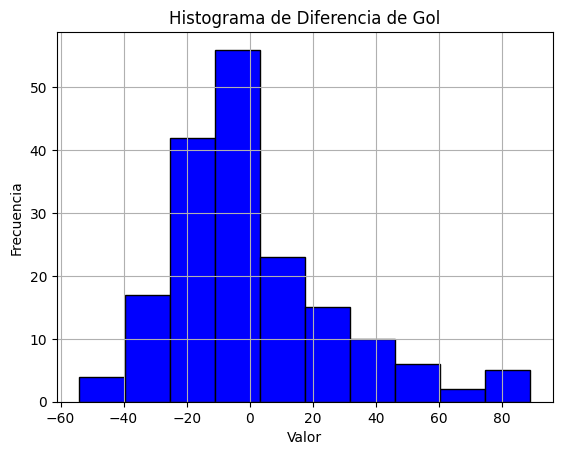

In [ ]:
x1 = df[["X1"]]
plt.hist(x1, bins=10, color='blue', edgecolor='black')

plt.title('Histograma de Diferencia de Gol')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

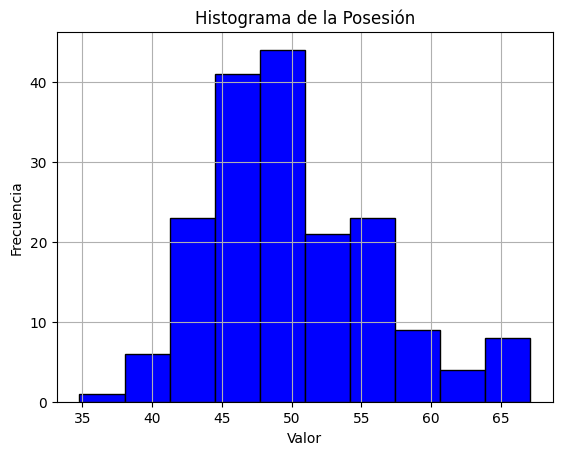

In [ ]:
x2 = df[["X2"]]
plt.hist(x2, bins=10, color='blue', edgecolor='black')

plt.title('Histograma de la Posesión')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

In [ ]:
# Inicia el Modelo de Regresión Líneal Múltiple y lo entrena con los datos
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X)

df["Y_hat"] = y_pred
df["ERROR"] = df["Y"]-df["Y_hat"]

Varianza del Error: 25.080320869595326 



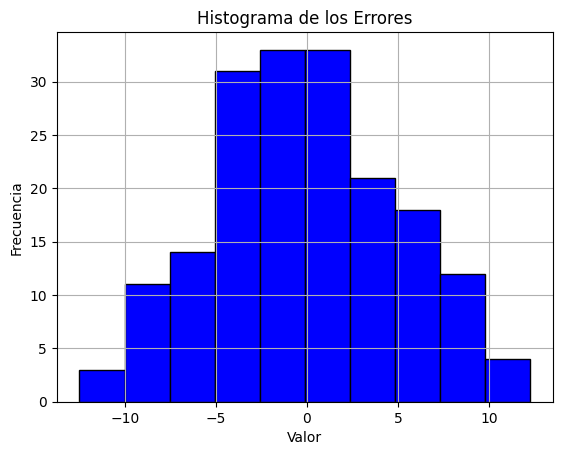

In [ ]:
error = df[["ERROR"]]
plt.hist(error, bins=10, color='blue', edgecolor='black')

plt.title('Histograma de los Errores')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)

varianza = df['ERROR'].var()
print(f"Varianza del Error: {varianza} \n")

plt.show()

In [ ]:
# Evalúa el rendimiento del modelo

ECM = metrics.mean_squared_error(y, y_pred)
EMA = metrics.mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('Error Medio Absoluto:', EMA)
print('Error Cuadrático Medio:',ECM)
print('Coeficiente de determinación R^2:', r2)

Error Medio Absoluto: 4.03603726949267
Error Cuadrático Medio: 24.94098575365313
Coeficiente de determinación R^2: 0.9151310323093598


In [ ]:
# Encontrar los Estimadores para los parámetros
print("Estimadores para los Parámetros\n")

# Estimador de la Varianza
n = len(df['Y'])
sigma_2 = (n/(n-2))*ECM
print(f"sigma^2 = {sigma_2}")

# Para encontrar los estimadores Bi´s
betas = model.coef_

# Para encontrar B0
B0 = model.intercept_

# Muestra los coeficientes y el intercepto
print('B0 =', B0)

i = 1
for coef in betas:
  print(f"B{i} = {coef}")
  i += 1

Estimadores para los Parámetros

sigma^2 = 25.221221548638
B0 = 48.71485817812843
B1 = 0.5996387892567717
B2 = 0.06735752843237673


# Realizar una predicción con la Regresión Líneal

In [ ]:
# Diferencia de gol
x1 = 50
# Posesión
x2 = 50

# Nuevos valores de x1 y x2 para hacer una predicción
valores_dados = [[x1, x2]]

# Realiza la predicción
y_hat = model.predict(valores_dados)

# Muestra la predicción
print('Estimación de puntos:', y_hat[0])

Estimación de puntos: 82.06467406258585


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
